In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

### 时间索引

In [2]:
t1 = datetime(2009,10,20)
t1

datetime.datetime(2009, 10, 20, 0, 0)

In [3]:
date_list = [
    datetime(2016,9,1),
    datetime(2016,9,10),
    datetime(2017,9,1),
    datetime(2017,9,20),
    datetime(2017,10,1)
]
date_list

[datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 9, 10, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 9, 20, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0)]

In [4]:
s1 = Series(np.random.rand(5), index=date_list)
s1

2016-09-01    0.574504
2016-09-10    0.919027
2017-09-01    0.828432
2017-09-20    0.261379
2017-10-01    0.800634
dtype: float64

In [5]:
s1.index

DatetimeIndex(['2016-09-01', '2016-09-10', '2017-09-01', '2017-09-20',
               '2017-10-01'],
              dtype='datetime64[ns]', freq=None)

In [12]:
s1[1]==s1[datetime(2016,9,10)] , s1['2016-9-10']==s1['20160910']

(True, True)

In [13]:
#按年月索引数据
s1['2017-09']

2017-09-01    0.828432
2017-09-20    0.261379
dtype: float64

In [14]:
#按年索引数据
s1['2016']

2016-09-01    0.574504
2016-09-10    0.919027
dtype: float64

In [15]:
#生成一个时间范围：起始时间为'2016-01-01'，间隔为5小时，共100组
date_list_new = pd.date_range('2016-01-01', periods=100, freq='5H')

In [17]:
s2 = Series(np.random.rand(100), index=date_list_new)
s2.head()

2016-01-01 00:00:00    0.242891
2016-01-01 05:00:00    0.463440
2016-01-01 10:00:00    0.991754
2016-01-01 15:00:00    0.990541
2016-01-01 20:00:00    0.575667
Freq: 5H, dtype: float64

### 时间转换

In [58]:
df_data = pd.DataFrame({'x': [0.1675, 7.3909, 8.0978, 0.9990000000000001, 0.667, 0.1771],
 'time': [930883, 893017, 976933, 907285, 914399, 814077]})
df_data.head(2)

,x,time
0,0.1675,930883
1,7.3909,893017


In [59]:
df_date_new = pd.DatetimeIndex(pd.to_datetime(df_date['time'],unit='s'))

In [61]:
df_data['day']=df_date_new.day
df_data['weekday']=df_date_new.day
df_data['hour']=df_date_new.day

In [63]:
del df_data['time']
df_data

,x,day,weekday,hour
0,0.1675,11,11,11
1,7.3909,11,11,11
2,8.0978,12,12,12
3,0.9990,11,11,11
4,0.6670,11,11,11
5,0.1771,10,10,10


### 时间采样

In [19]:
s1['2016-09'].mean()

0.7467657445690135

In [21]:
#按月采样求均值
s1.resample('M').mean()

2016-09-30    0.746766
2016-10-31         NaN
2016-11-30         NaN
2016-12-31         NaN
2017-01-31         NaN
2017-02-28         NaN
2017-03-31         NaN
2017-04-30         NaN
2017-05-31         NaN
2017-06-30         NaN
2017-07-31         NaN
2017-08-31         NaN
2017-09-30    0.544906
2017-10-31    0.800634
Freq: M, dtype: float64

In [34]:
#用第一个时间点索引的值填充后续无索引值
s1.resample('H').ffill().head()

2016-09-01 00:00:00    0.574504
2016-09-01 01:00:00    0.574504
2016-09-01 02:00:00    0.574504
2016-09-01 03:00:00    0.574504
2016-09-01 04:00:00    0.574504
Freq: H, dtype: float64

In [35]:
#用下一个时间点索引的值填充后续无索引值
s1.resample('H').bfill().head()

2016-09-01 00:00:00    0.574504
2016-09-01 01:00:00    0.919027
2016-09-01 02:00:00    0.919027
2016-09-01 03:00:00    0.919027
2016-09-01 04:00:00    0.919027
Freq: H, dtype: float64

### 按5小时间隔数据来显示股票走势

In [41]:
stock_df = DataFrame(index=date_list_new)
stock_df['BABA'] = np.random.randint(80, 160, size=len(date_list_new))
stock_df['TENCENT'] = np.random.randint(30, 50, size=len(date_list_new))

In [42]:
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,148,41
2016-01-01 05:00:00,99,32
2016-01-01 10:00:00,128,48
2016-01-01 15:00:00,102,34
2016-01-01 20:00:00,109,49


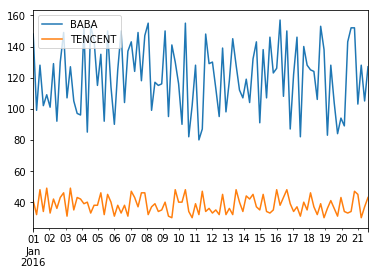

In [43]:
stock_df.plot()

### 按一周间隔数据来显示股票走势

In [46]:
weekly_df = DataFrame()
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

In [47]:
weekly_df.head()

,BABA,TENCENT
2016-01-03,114.600000,40.266667
2016-01-10,123.939394,38.151515
2016-01-17,120.764706,38.176471
2016-01-24,118.777778,37.444444


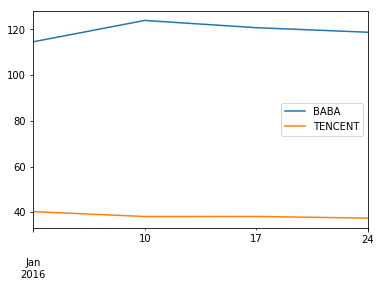

In [48]:
weekly_df.plot()